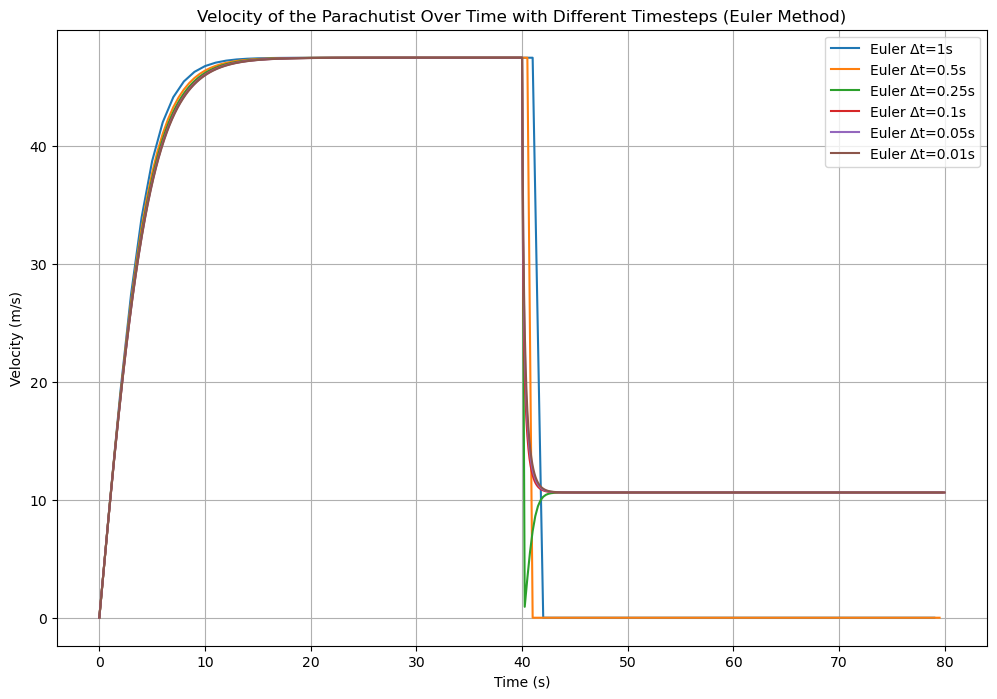

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

g = 9.8  # Acceleration due to gravity (m/s^2)
m1 = 100  # Mass of parachutist (kg)
m2 = 15  # Mass of equipment (kg)
k1 = 0.5  # Air resistance coefficient during free fall (kg/m)
k2 = 10  # Air resistance coefficient after parachute is extended (kg/m)
h0 = 3000  # Initial altitude (m)
tg = 40  # Time when parachute is extended (s)

# Total mass
m = m1 + m2

# The ODE to solve is dv/dt = g - k/m * v^2, with k changing at t=tg
def ode(t, v):
    if t < tg:
        k = k1
    else:
        k = k2
    return g - (k/m) * v**2

# Time span and initial condition for solve_ivp
t_span = (0, 2 * tg)  # Assuming it will take less than twice the deployment time to land
v0 = [0]  # Initial velocity




# Re-implementing Euler's method with smaller timesteps to avoid instability
# and to match the solution curve shape of the solve_ivp method
def euler_method(ode_func, initial_value, time_span, step_size):
    """
    Parameters:
    - ode_func: The ODE function to solve.
    - initial_value: The initial value of the dependent variable.
    - time_span: Tuple of (start_time, end_time).
    - step_size: The timestep for the Euler method.

    Returns:
    - t_values: Array of time values.
    - y_values: Array of values of the dependent variable.
    """
    t_values = np.arange(time_span[0], time_span[1], step_size)
    y_values = np.zeros(len(t_values))
    y_values[0] = initial_value

    for i in range(1, len(t_values)):
        y_values[i] = y_values[i - 1] + step_size * ode_func(t_values[i - 1], y_values[i - 1])
        # Implement a simple check to prevent overflow in the numerical solution
        if y_values[i] < 0 or y_values[i] > 1e6:  # arbitrary large number to indicate instability
            y_values[i] = y_values[i - 1]  # if instability occurs, stop the integration
            break

    return t_values, y_values

# Smaller timesteps for higher accuracy
#timesteps = [1,0.5,0.25,0.1, 0.05, 0.01]  # Smaller timesteps to prevent instability
timesteps =  [1, 0.4, 0.8, 1.6, 3.2,3.8, 4.2, 6.4, 7.3, 8.4] #Instable array of steps
#timesteps = [1,0.5,0.25]

# Solve the ODE with Euler's method for each timestep
euler_solutions = {dt: euler_method(ode, v0[0], t_span, dt) for dt in timesteps}

# Plotting Euler's method solutions with different timesteps
plt.figure(figsize=(12, 8))
for dt, (t_values, v_values) in euler_solutions.items():
    plt.plot(t_values, v_values, label=f'Euler Δt={dt}s')


plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity of the Parachutist Over Time with Different Timesteps (Euler Method)')
plt.legend()
plt.grid(True)
plt.show()